In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

# 백분위수 (percentile) 와 사분계수(quantile)
---

- 백분위수 : 데이터를 크기 순서대로 오름차순 정렬 했을 때, 백분율로 나타낸 특정 위치의 값
    - 그림은 10%단위지만, 1자리수 단위로 측정가능하다.

![image](https://user-images.githubusercontent.com/74717033/133714935-ab07b6bb-78c2-4e22-ba14-db341e9881ee.png)



- 사분위수 : 데이터를 크기 순서대로 오름차운으로 정렬 했을 때, 4등분한 위치의 값

![image](https://user-images.githubusercontent.com/74717033/133714995-745e9505-96e2-4f3e-b423-abf343e384a6.png)

- 실질적으론 사분위수가 백분위수에 포함되어 백분위수만 확인해도 되지만, 실제 분석에서는 사분위수를 살펴보는 것이 더 유용하다.

## 백분위수 & 사분위수 구현코드

- 백분위수
    - numpy.percentile(x,q) # q : 1 ~ 100중 확인하고 싶은 위치

- 사분위수
    - numpy.quantile(x,q) # q : 0 ~ 1 중 확인하고 싶은 위치
    
    
- 하지만 실상 둘이 같은 역할을 함.
    - e.g) 전체 데이터중 50%의 값을 보고 싶을때
        - numpy.percentile(x,50)
        - numpy.quantile(x,0.5)

In [2]:
x = np.arange(1, 12, 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [3]:
# 10% 위치에 있는 값 출력하기
print(np.percentile(x, 10))
print(np.quantile(x, 0.1)) # 사실상 같음

2.0
2.0


In [4]:
# 25%에 있는 값 출력하기
print(np.percentile(x, 25))
print(np.quantile(x, 0.25)) # 사실상 같음

3.5
3.5


- 실제 x를 보면 3.5라는 값은 존재하지 않는다. 그런데 왜 3.5가 나왔을까?
    - x라는 값의 25%에 해당하는 값을 출력하기 때문
    - 전체 x값을 오름차순 정렬했을때 25% 부분에 해당하는 값이 없다면, 실제 존재하는 값에서 25%에 해당하는 중간치의 값을 출력


- 즉, percentile이나 quantile을 사용할때는 실제 데이터셋에는 없는 값이어도 출력이 될 수 있다. 해당 값이 출력된다고 해서 그 값이 무조건 데이터 셋에 존재하는 것은 아닐 수도 있음을 인지하고 있어야 함.

# 왜도 (Skewness)
---

- 왜도 : 분포의 비대칭도를 나타내는 통계량
    - 왜도가 음수 : 오른쪽으로 치우쳐 있음
    - 왜도가 양수 : 왼쪽으로 치우쳐 있음
    - 왜도가 0 : 정규분포 모양을 따름
    
![image](https://user-images.githubusercontent.com/74717033/133715736-6f894810-5c54-4760-8f39-90116b7918e5.png)

- 일반적으로 왜도의 절대값이 1.5이상이면 많이 치우쳤다고 판단한다. (절대적인 기준은 아님)

#### 왜도 계산

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [6]:
x1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [7]:
pd.Series(x1).value_counts(sort = False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

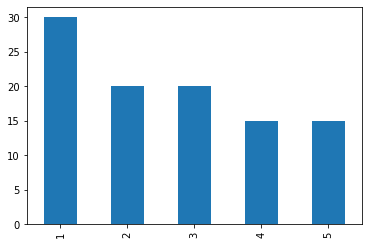

In [29]:
# sort = False를 한이유?
# sort를 default로 두면 빈도순으로 값을 정렬한다. 
# 지금은 1 ~ 5사이의 값이 각각 어떻게 분포되었는지 순서대로 보면서 치우침의 정도를 보기 위한 것이므로 False를 했다.

pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

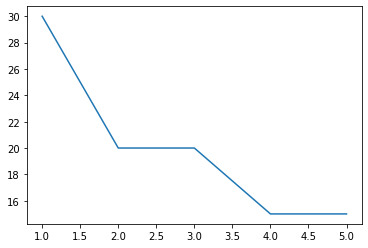

In [19]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'line')

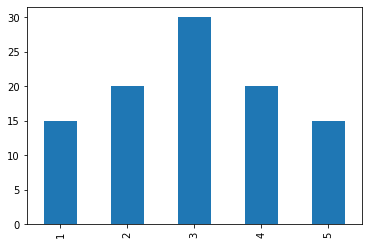

In [20]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

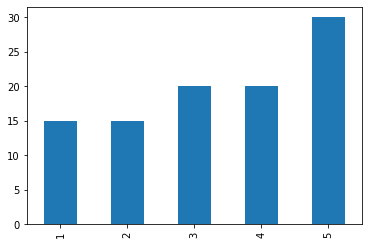

In [10]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [11]:
print("좌로 치우쳤을 때 왜도:", skew(x1))
print("치우치지 않았을 때 왜도:", skew(x2))
print("우로 치우친 왜도:", skew(x3))

좌로 치우쳤을 때 왜도: 0.3192801008486361
치우치지 않았을 때 왜도: 0.0
우로 치우친 왜도: -0.31928010084863606


#### 첨도 계산

In [12]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

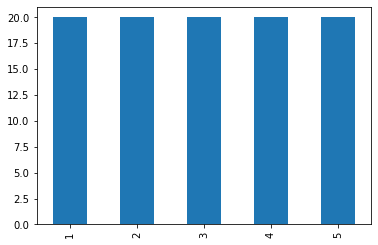

In [13]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

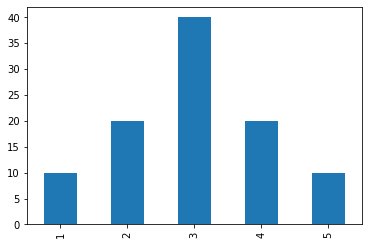

In [14]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

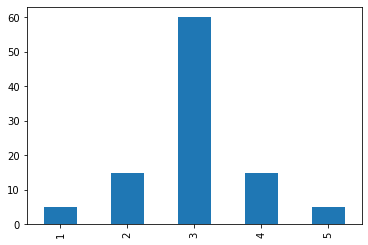

In [15]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [16]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", kurtosis(x1))
print("조금 뾰족할 때 첨도:", kurtosis(x2))
print("매우 뾰족할 때 첨도:", kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636
